In [1]:
import pandas as pd

In [2]:
df_mid = pd.read_csv("pythia_93k.csv")
df_full = pd.read_csv("pythia_full.csv")

In [3]:
param_cols = ["160M", "1B", "2.8B", "12B"]

In [4]:
def process_dataframe(df):
    for col in df.columns:
        if col != 'Task':
            df[col] = df[col].str.split().str[0].astype(float)
    return df

In [5]:
df_mid = process_dataframe(df_mid)
df_full = process_dataframe(df_full)

In [6]:
df_full.set_index('Task', inplace=True)
df_mid.set_index('Task', inplace=True)

In [7]:
df_mid = df_mid.loc[:, param_cols]
df_full = df_full.loc[:, param_cols]

In [8]:
df_diff = df_full.subtract(df_mid)

In [9]:
df_diff

,160M,1B,2.8B,12B
Task,,,,
Lambada (OpenAI),-0.040,0.013,0.014,0.021
PIQA,0.002,0.006,0.008,0.005
WinoGrande,0.019,0.018,0.002,0.009
WSC,0.000,0.000,0.020,-0.087
ARC - Easy,-0.028,0.018,0.022,0.016
ARC - Challenge,-0.004,0.015,0.014,0.006
SciQ,-0.023,0.003,0.007,-0.007
LogiQA,-0.024,-0.001,-0.008,-0.006


In [10]:
import numpy as np

slopes = {}
for task in df_diff.index:
    x = np.arange(len(df_diff.columns))
    y = df_diff.loc[task].values
    slope, _ = np.polyfit(x, y, deg=1)
    slopes[task] = slope

# Create a DataFrame with slopes
slope_df = pd.DataFrame(list(slopes.items()), columns=['Task', 'Slope'])

In [11]:
slope_df.sort_values(by='Slope',ascending=False)

,Task,Slope
0,Lambada (OpenAI),0.0184
4,ARC - Easy,0.0136
6,SciQ,0.0052
7,LogiQA,0.0047
5,ARC - Challenge,0.0029
1,PIQA,0.0011
2,WinoGrande,-0.0046
3,WSC,-0.0241


In [38]:
df_diff1 = df_diff.reset_index()

In [47]:
df_diff1[param_cols].mean(axis=1)

0    0.00200
1    0.00525
2    0.01200
3   -0.01675
4    0.00700
5    0.00775
6   -0.00500
7   -0.00975
dtype: float64

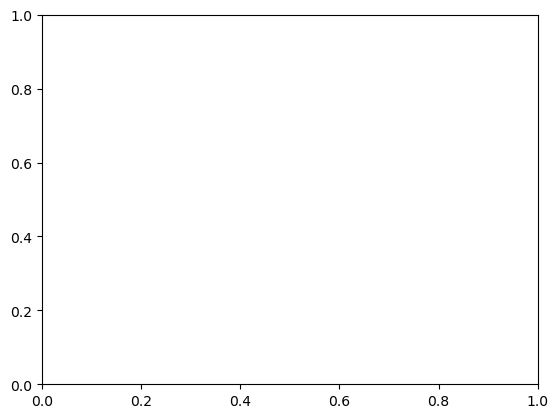

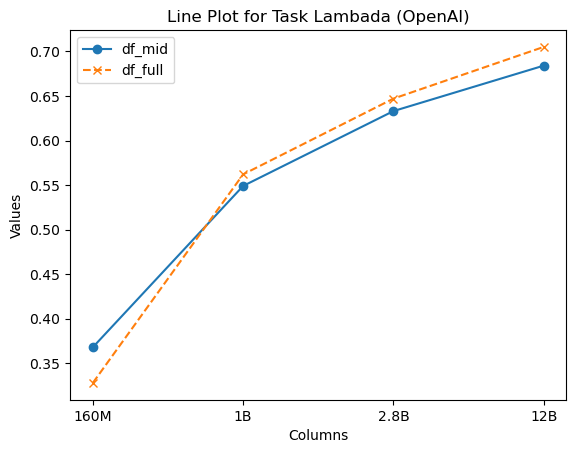

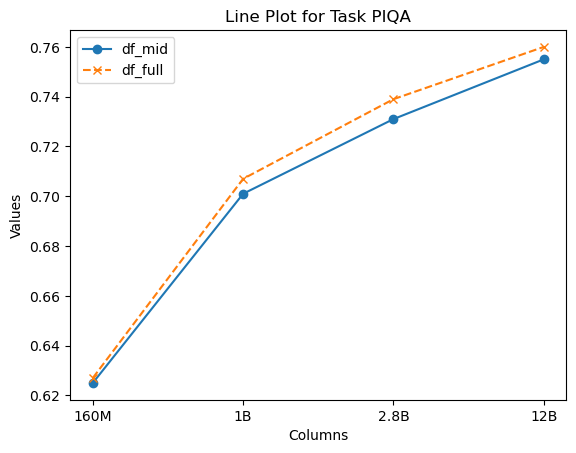

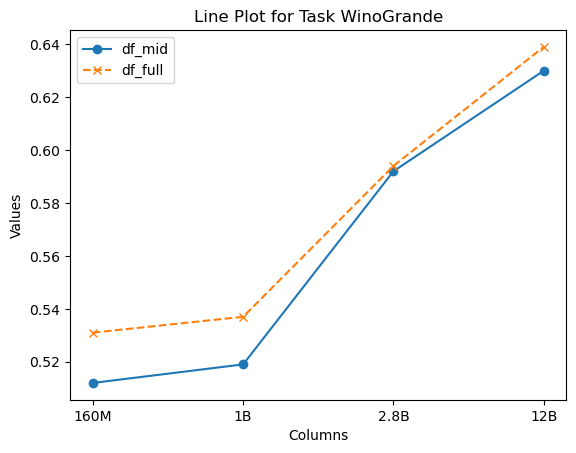

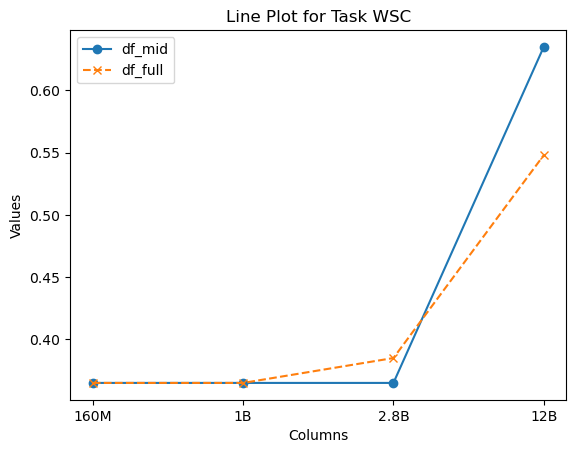

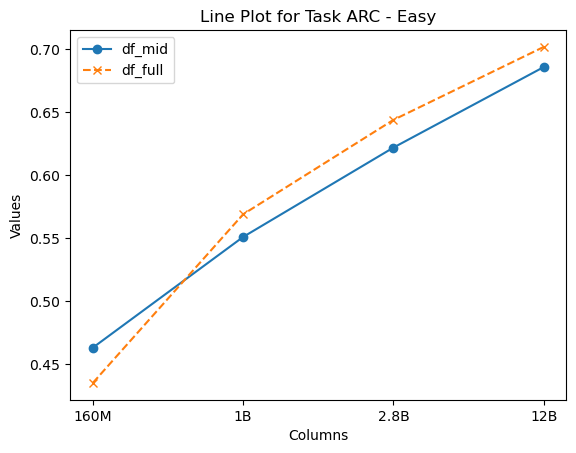

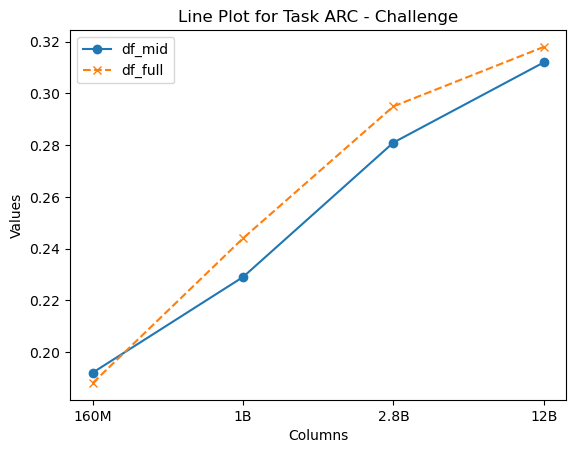

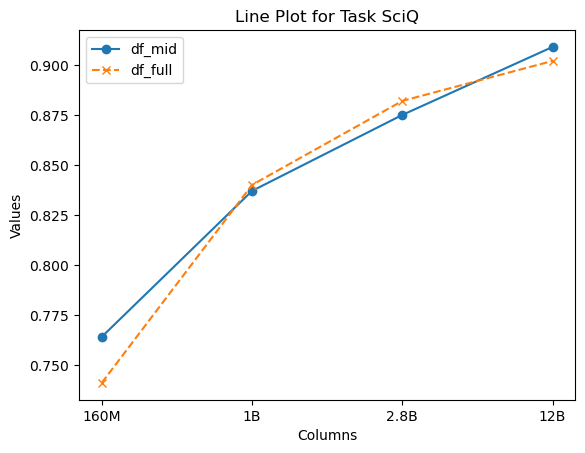

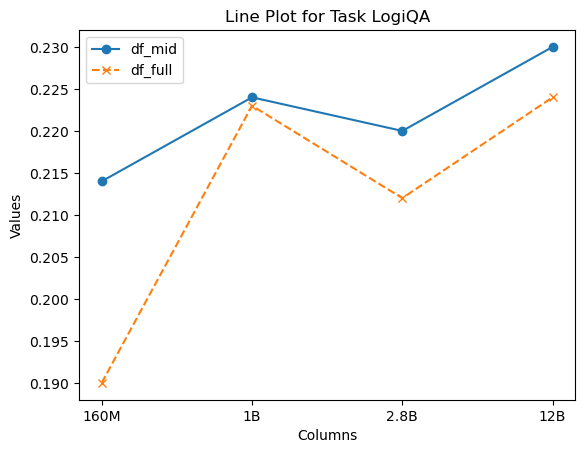

In [83]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Plot line plots for each task
tasks = ["Lambada (OpenAI)","PIQA","WinoGrande"]

for task in df_full.index:
    fig, ax = plt.subplots()

    x = np.arange(len(df_mid.columns))
    y1 = df_mid.loc[task].values
    y2 = df_full.loc[task].values

    ax.plot(x, y1, label=f'df_mid', linestyle='-', marker='o')
    ax.plot(x, y2, label=f'df_full', linestyle='--', marker='x')

    ax.set_xticks(x)
    ax.set_xticklabels(df_mid.columns)

    ax.set_xlabel('Columns')
    ax.set_ylabel('Values')
    ax.set_title(f'Line Plot for Task {task}')

    ax.legend()

    plt.show()